# IA703 AIT Project : Prime numbers to reduce complexity
### Edouard Ducloy

In [31]:
# imports
from CompactIntegerCoding import *
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from time import time
import random

In [32]:
def primes(N):
    '''
    Return all prime numbers from 0 to N,
    and the next prime number superior to N.
    ex: prime(8) = [2, 3, 5, 7, 11]
    '''
    if N == 0:
        N = 1
    
    list_primes = []
    is_prime = [True] * (N + 1)

    for num in range(2, int(N**0.5) + 1):
        if is_prime[num]:
            list_primes.append(num)
            for multiple in range(num * num, N + 1, num):
                is_prime[multiple] = False

    for num in range(max(2, int(N**0.5) + 1), N + 1):
        if is_prime[num]:
            list_primes.append(num)

    next_prime = N + 1
    while True:
        is_next_prime = True
        for divisor in range(2, int(next_prime**0.5) + 1):
            if next_prime % divisor == 0:
                is_next_prime = False
                break
        if is_next_prime:
            list_primes.append(next_prime)
            break
        next_prime += 1

    return list_primes

print (primes(8))


[2, 3, 5, 7, 11]


In [33]:
def is_prime_number(n):
    '''
    Check if n is a prime number
    '''
    if n <= 1:
        return False
    elif n <= 3:
        return True
    elif n % 2 == 0 or n % 3 == 0:
        return False
    i = 5
    while i * i <= n:
        if n % i == 0 or n % (i + 2) == 0:
            return False
        i += 6
    return True

for i in range(31):
    if is_prime_number(i) == True:
        print(i, is_prime_number(i))

2 True
3 True
5 True
7 True
11 True
13 True
17 True
19 True
23 True
29 True


In [34]:
def first_primes(N):
    '''
    Return the N first prime numbers
    '''
    if N <= 0:
        return []
    
    list_primes = []
    i = 2
    while len(list_primes) < N:
        if is_prime_number(i):
            list_primes.append(i)
        i += 1

    return list_primes

print(first_primes(15))

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47]


In [35]:
def prime_decompose(N):
    '''
    Perform N decomposition in prime numbers
    Return a list of tuples, each tuple composed of a prime number and its associated power
    ex: prime_decompose(588) = [(2, 2), (3, 1), (7, 2)] since 588 = 2² x 3 x 7²
    '''
    if N < 2:
        return N
    
    list_primes = primes(N)
    factors = []

    for prime in list_primes:
        power = 0
        while N % prime == 0:
            power += 1
            N //= prime
        if power > 0:
            factors.append((prime, power))

    if N > 1:
        factors.append((nombre, 1))

    return factors

print (prime_decompose(399))

[(3, 1), (7, 1), (19, 1)]


In [36]:
def complexity(seq):
    '''
    Return the complexity of a sequence seq
    '''
    no_space_seq = seq.replace(" ", "")
    C = len(no_space_seq)    
    
    return C

print (complexity('1 001 111'))

7


In [37]:
def PrimeDecomposeCoding(N):
    '''
    Code a number N by using prime number decomposition
    Each prime number with 0 power is coded 0
    '''
    N = N + 2
    list_primes = primes(N)
    factors = prime_decompose(N)
    code = ''
    k = 0
    
    for i,j in (factors):
        while list_primes[k] != i:
            code += ' 0'
            k += 1
        code += ' ' + CompactCoding0(j)
        k += 1
        
    return '00' + code


In [38]:
N = 2056
print ('Decomposition: ', prime_decompose(N+2))
print ('Primes list: ', primes(prime_decompose(N+2)[-1][0]))
print ('Compact: ', CompactCoding(N), '=>', complexity(CompactCoding(N)))
print ('Round: ', RoundReferenceCoding(N), '=>', complexity(RoundReferenceCoding(N)))
print ('PrimeDecompose: ', PrimeDecomposeCoding(N), '=>', complexity(PrimeDecomposeCoding(N)))

Decomposition:  [(2, 1), (3, 1), (7, 3)]
Primes list:  [2, 3, 5, 7, 11]
Compact:  1 00000001010 => 12
Round:  00 00 01 11010 => 11
PrimeDecompose:  00 1 1 0 01 => 7


In [39]:
N = 197
print ('Decomposition: ', prime_decompose(N+2))
print ('Primes list: ', primes(prime_decompose(N+2)[-1][0]))
print ('PrimeDecompose: ', PrimeDecomposeCoding(N), '=>', complexity(PrimeDecomposeCoding(N)))

Decomposition:  [(199, 1)]
Primes list:  [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211]
PrimeDecompose:  00 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 => 48


Traitement en cours: 100%|██████████| 200/200 [00:00<00:00, 8115.36it/s]


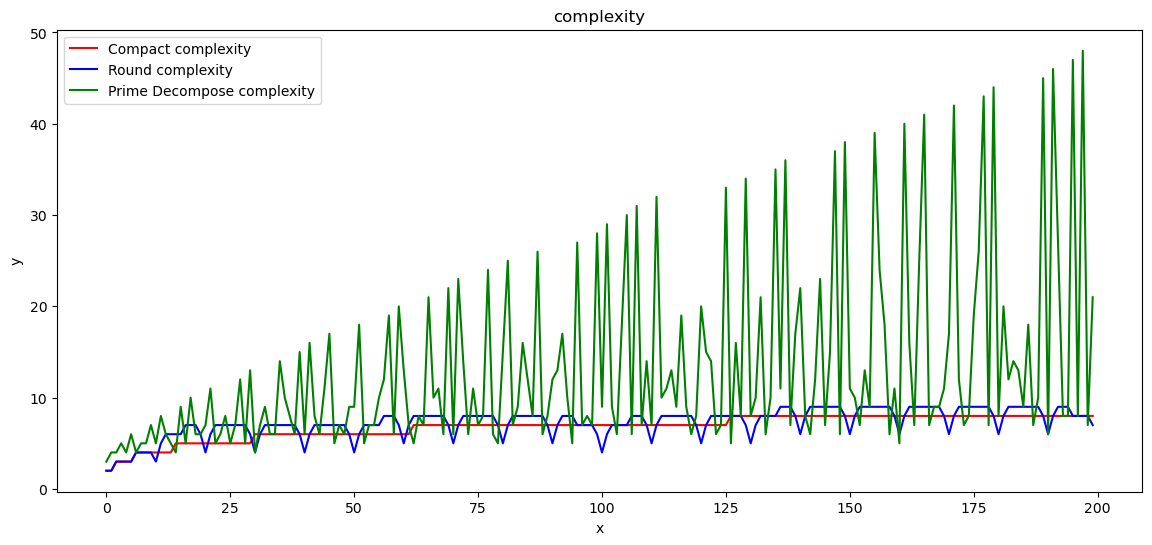

0.3856332302093506


In [40]:
t = time()
liste_num = []
liste_compact = []
liste_round = []
liste_decompose = []
liste_skip = []
liste_proxy = []
liste_prime_coding = []
for i in tqdm(range (200), desc="Traitement en cours"):
    liste_num.append(i)
    liste_compact.append(complexity(CompactCoding(i)))
    liste_round.append(complexity(RoundReferenceCoding(i)))
    liste_decompose.append(complexity(PrimeDecomposeCoding(i)))
#     liste_skip.append(complexity(PrimeSkipCoding(i)))
#     liste_proxy.append(complexity(PrimeProxyCoding(i)))
#     liste_prime_coding.append(complexity(PrimeCoding(i)))
    
plt.figure(figsize=(14, 6))
plt.plot(liste_num, liste_compact, label='Compact complexity', color='red')
plt.plot(liste_num, liste_round, label='Round complexity', color='blue')
plt.plot(liste_num, liste_decompose, label='Prime Decompose complexity', color='green')
# plt.plot(liste_num, liste_skip, label='Prime Skip complexity', color='cyan')
# plt.plot(liste_num, liste_proxy, label='Prime Proxy complexity', color='magenta')
# plt.plot(liste_num, liste_prime_coding, label='Prime Coding complexity', color='k', ls=':')
plt.xlabel('x')
plt.ylabel('y')
plt.title('complexity')
# plt.ylim(5, 15)
plt.legend()
plt.show()

print (time() - t)

In [41]:
def PrimeSkipCoding(N):
    '''
    Code a number N by using prime number decomposition
    Quantity of prime number with 0 power in a raw is coded with a heading 0
    '''
    N = N + 2
    list_primes = primes(N)
    factors = prime_decompose(N)
    code = ''
    k = 0
    
    for i,j in (factors):
        m = 0
        while list_primes[k] != i:
            k += 1
            m += 1
        if m == 0:
            code += ' ' + CompactCoding0(j)
        else:
            code += ' 0 ' + CompactCoding0(m) + " " + CompactCoding0(j)
        k += 1
        
    return '01' + code
        

In [42]:
N = 5474
print ('Decomposition: ', prime_decompose(N+2))
print ('Primes list: ', primes(prime_decompose(N+2)[-1][0]))
print ('Compact: ', CompactCoding(N), '=>', complexity(CompactCoding(N)))
print ('Round: ', RoundReferenceCoding(N), '=>', complexity(RoundReferenceCoding(N)))
print ('PrimeSkip: ', PrimeSkipCoding(N), '=>', complexity(PrimeSkipCoding(N)))

Decomposition:  [(2, 2), (37, 2)]
Primes list:  [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41]
Compact:  1 010101100100 => 13
Round:  01 11001 00 1100 => 13
PrimeSkip:  01 00 0 100 00 => 10


Traitement en cours: 100%|██████████| 200/200 [00:00<00:00, 17308.23it/s]


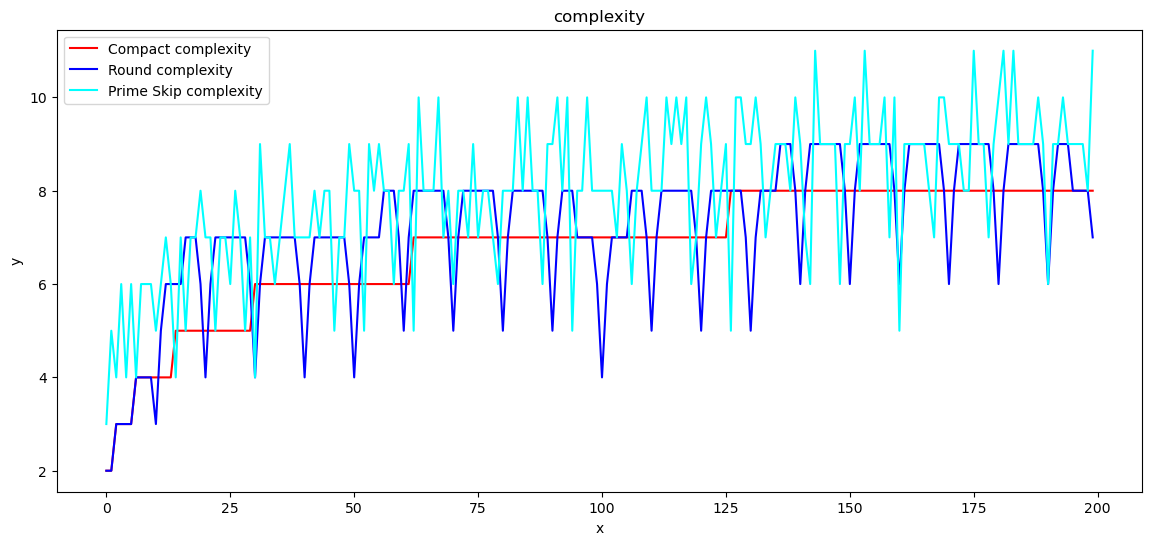

0.37186765670776367


In [43]:
t = time()
liste_num = []
liste_compact = []
liste_round = []
liste_decompose = []
liste_skip = []
liste_proxy = []
liste_prime_coding = []
for i in tqdm(range (200), desc="Traitement en cours"):
    liste_num.append(i)
    liste_compact.append(complexity(CompactCoding(i)))
    liste_round.append(complexity(RoundReferenceCoding(i)))
#     liste_decompose.append(complexity(PrimeDecomposeCoding(i)))
    liste_skip.append(complexity(PrimeSkipCoding(i)))
#     liste_proxy.append(complexity(PrimeProxyCoding(i)))
#     liste_prime_coding.append(complexity(PrimeCoding(i)))
    
plt.figure(figsize=(14, 6))
plt.plot(liste_num, liste_compact, label='Compact complexity', color='red')
plt.plot(liste_num, liste_round, label='Round complexity', color='blue')
# plt.plot(liste_num, liste_decompose, label='Prime Decompose complexity', color='green')
plt.plot(liste_num, liste_skip, label='Prime Skip complexity', color='cyan')
# plt.plot(liste_num, liste_proxy, label='Prime Proxy complexity', color='magenta')
# plt.plot(liste_num, liste_prime_coding, label='Prime Coding complexity', color='k', ls=':')
plt.xlabel('x')
plt.ylabel('y')
plt.title('complexity')
# plt.ylim(5, 15)
plt.legend()
plt.show()

print (time() - t)

In [62]:
def PrimeProxyCoding(N):
    '''
    Code a number N by using prime number as proxy
    '''
    N = N + 2
    list_primes = primes(N)
    indice = np.argmin(np.abs(np.array(list_primes)-N))
    
    if indice == len(list_primes) - 2 and CompactCoding0(N-list_primes[indice]) == '0':
        return '10 ' + CompactCoding0(indice)
    elif indice == len(list_primes) - 2 and CompactCoding0(N-list_primes[indice]) != '0':
        return '10 ' + CompactCoding0(indice) + ' ' + CompactCoding0(N-list_primes[indice])
    elif indice == len(list_primes) - 1:
        return '11 ' + CompactCoding0(indice) + ' ' + CompactCoding0(list_primes[indice]-N)


In [63]:
N = 618
print ('Primes list: ', primes(N+2)[-2:])
print ('Compact: ', CompactCoding(N), '=>', complexity(CompactCoding(N)))
print ('Round: ', RoundReferenceCoding(N), '=>', complexity(RoundReferenceCoding(N)))
print ('PrimeProxy: ', PrimeProxyCoding(N), '=>', complexity(PrimeProxyCoding(N)))

Primes list:  [619, 631]
Compact:  1 001101100 => 10
Round:  00 11111 1 010 => 11
PrimeProxy:  10 110011 1 => 9


Traitement en cours: 100%|██████████| 200/200 [00:00<00:00, 15462.59it/s]


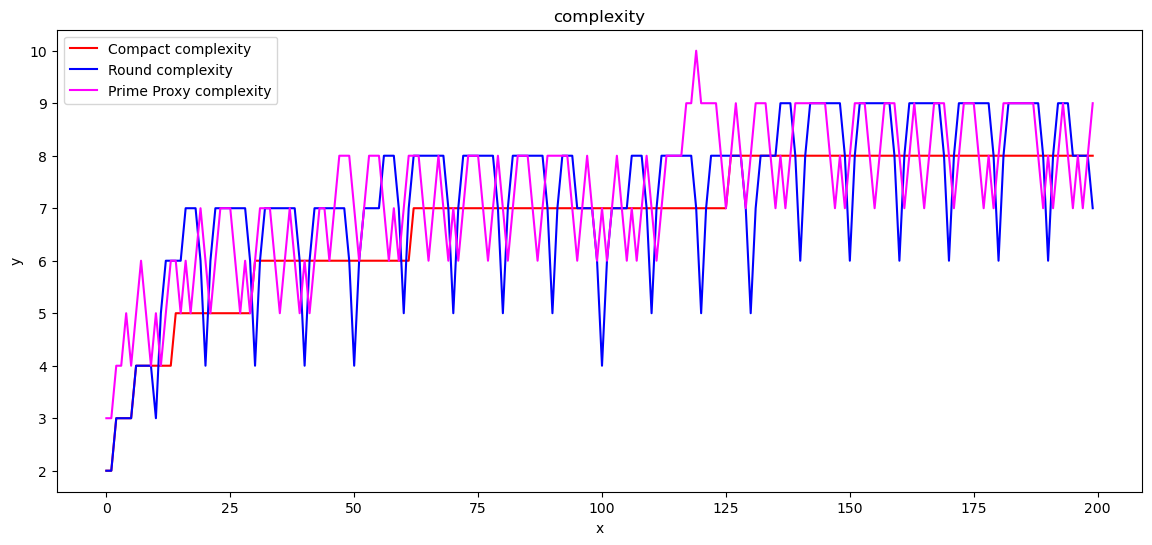

0.38269686698913574


In [46]:
t = time()
liste_num = []
liste_compact = []
liste_round = []
liste_decompose = []
liste_skip = []
liste_proxy = []
liste_prime_coding = []
for i in tqdm(range (200), desc="Traitement en cours"):
    liste_num.append(i)
    liste_compact.append(complexity(CompactCoding(i)))
    liste_round.append(complexity(RoundReferenceCoding(i)))
#     liste_decompose.append(complexity(PrimeDecomposeCoding(i)))
#     liste_skip.append(complexity(PrimeSkipCoding(i)))
    liste_proxy.append(complexity(PrimeProxyCoding(i)))
#     liste_prime_coding.append(complexity(PrimeCoding(i)))
    
plt.figure(figsize=(14, 6))
plt.plot(liste_num, liste_compact, label='Compact complexity', color='red')
plt.plot(liste_num, liste_round, label='Round complexity', color='blue')
# plt.plot(liste_num, liste_decompose, label='Prime Decompose complexity', color='green')
# plt.plot(liste_num, liste_skip, label='Prime Skip complexity', color='cyan')
plt.plot(liste_num, liste_proxy, label='Prime Proxy complexity', color='magenta')
# plt.plot(liste_num, liste_prime_coding, label='Prime Coding complexity', color='k', ls=':')
plt.xlabel('x')
plt.ylabel('y')
plt.title('complexity')
# plt.ylim(5, 15)
plt.legend()
plt.show()

print (time() - t)

In [47]:
def PrimeCoding(N):
    '''
    return the shortest binary sequence between PrimeDecomposeCoding, PrimeSkipCoding, and PrimeProxyCoding
    '''
    PDC = PrimeDecomposeCoding(N)
    PSC = PrimeSkipCoding(N)
    PPC = PrimeProxyCoding(N)
    
    if min(complexity(PDC), complexity(PSC), complexity(PPC)) == complexity(PDC):
        return PDC
    if min(complexity(PDC), complexity(PSC), complexity(PPC)) == complexity(PSC):
        return PSC
    if min(complexity(PDC), complexity(PSC), complexity(PPC)) == complexity(PPC):
        return PPC

Traitement en cours: 100%|██████████| 200/200 [00:00<00:00, 6091.77it/s]


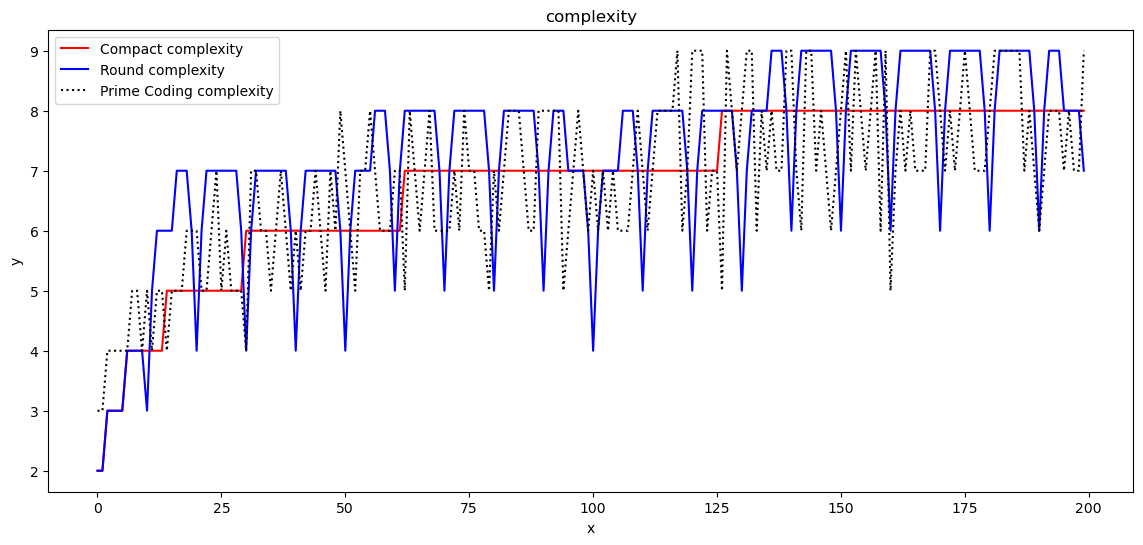

0.42717695236206055


In [48]:
t = time()
liste_num = []
liste_compact = []
liste_round = []
liste_decompose = []
liste_skip = []
liste_proxy = []
liste_prime_coding = []
for i in tqdm(range (200), desc="Traitement en cours"):
    liste_num.append(i)
    liste_compact.append(complexity(CompactCoding(i)))
    liste_round.append(complexity(RoundReferenceCoding(i)))
#     liste_decompose.append(complexity(PrimeDecomposeCoding(i)))
#     liste_skip.append(complexity(PrimeSkipCoding(i)))
#     liste_proxy.append(complexity(PrimeProxyCoding(i)))
    liste_prime_coding.append(complexity(PrimeCoding(i)))
    
plt.figure(figsize=(14, 6))
plt.plot(liste_num, liste_compact, label='Compact complexity', color='red')
plt.plot(liste_num, liste_round, label='Round complexity', color='blue')
# plt.plot(liste_num, liste_decompose, label='Prime Decompose complexity', color='green')
# plt.plot(liste_num, liste_skip, label='Prime Skip complexity', color='cyan')
# plt.plot(liste_num, liste_proxy, label='Prime Proxy complexity', color='magenta')
plt.plot(liste_num, liste_prime_coding, label='Prime Coding complexity', color='k', ls=':')
plt.xlabel('x')
plt.ylabel('y')
plt.title('complexity')
# plt.ylim(5, 15)
plt.legend()
plt.show()

print (time() - t)

In [64]:
def PrimeDecoding(code):
    '''
    Decode a number from its prime number coding
    '''
    exponents = code.strip().split()

    if exponents[0] == '00':
        exponents = exponents[1:]
        exponents = [CompactDecoding0(exp) for exp in exponents]
        primes = first_primes(len(exponents))
        N = 1
        for i, exp in enumerate(exponents):
            N *= primes[i] ** exp
            
    elif exponents[0] == '01':
        exponents = exponents[1:]
        indice = 0
        N = 1
        for i in range(len(exponents)):
            k = 0
            if exponents[i] == '0':
                k = CompactDecoding0(exponents[i+1])
                indice += k
            elif exponents[i-1] == '0':
                pass             
            else:
                N *= first_primes(indice+1)[indice] ** CompactDecoding0(exponents[i])
                indice += 1
                
    elif exponents[0] == '10':
        exponents = exponents[1:]
        if len(exponents) == 1:
            N = first_primes(CompactDecoding0(exponents[0])+1)[-1]
        else:
            N = first_primes(CompactDecoding0(exponents[0])+1)[-1] + CompactDecoding0(exponents[1])
            
    elif exponents[0] == '11':
        exponents = exponents[1:]
        N = first_primes(CompactDecoding0(exponents[0])+1)[-1] - CompactDecoding0(exponents[1])
                                                
    return N - 2


In [65]:
random_list = []

for _ in range(100):
    random_int = random.randint(1, 10000)
    random_list.append(random_int)

print(random_list)

[2690, 8794, 6117, 2766, 1566, 6162, 3781, 6457, 6901, 7990, 5386, 5839, 8314, 6510, 4305, 8091, 3814, 6263, 1288, 3998, 4589, 2430, 1444, 9456, 7990, 1403, 9481, 4997, 7189, 3369, 3350, 7758, 499, 5315, 4333, 1949, 5795, 109, 7781, 1705, 2681, 5130, 8940, 1228, 6896, 2289, 6617, 4431, 4142, 9408, 7905, 7182, 4376, 4057, 9373, 905, 5680, 2269, 943, 7265, 4334, 5024, 782, 5943, 6656, 6422, 6141, 9403, 1909, 3580, 2192, 3230, 1286, 2541, 3798, 5047, 1471, 3531, 3411, 9225, 9537, 6749, 6070, 3621, 805, 1072, 8669, 624, 2185, 5693, 6415, 5717, 2076, 4362, 876, 1422, 2352, 2797, 8484, 4908]


In [66]:
for N in random_list:
    print (PrimeCoding(N))

11 10001001 1
01 00 1 0 0000001 1
11 100011111 00
01 10 0 01000 1
00 11 0 0 00
10 100100100 1
10 000001111 10
10 101000111 010
10 101111000 10
01 01 01 0 011 1
10 011000111 1
10 011111111 00
00 00 01 0 1 1
01 10 0 01 1 0 000 1
01 0 0010 1 0 01 1
10 111111011
01 01 00 0 111 1
10 100101111 00
01 1 1 1 0 100 1
00 11 0 01
10 001101110
01 001 0 000 1
11 1100110 1
01 1 0 001111110 1
01 01 01 0 011 1
11 1100000 10
10 0010011000 10
10 010011110
11 110011000 00
10 11011100
01 01 0 010001 1
10 111011010 1
10 100000 00
01 0 11 1 0 001011 1
00 0 1 1 0 0 0 00
10 00101010
00 0 0 0 0 1 0 1 0 0 0 1
10 1110 00
01 0 111 1 0 1101 1
11 00001100 00
10 10000110
01 00 0 1010000 1
10 0001011001 1
01 1 1 1 0 011 1
11 101111000 1
01 0 011 1 0 101 1
10 101011000
01 0 10 1 1 0 10 1
01 10 0 00 1 0 001 1
11 0010001101 01
10 111101000
01 10 0 010111 1
10 001010110 11
10 000110001 00
00 0 1 11
10 0011100
11 011101101 1
10 01010010 00
00 0 01 1 1
01 0 11 00 0 001 1
01 10 0 11010 1
10 010100011 01
00 10 0 0 00
10 10000

In [67]:
for N in random_list:
    print (PrimeDecoding(PrimeCoding(N)) == N)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


Traitement en cours: 100%|██████████| 500/500 [00:05<00:00, 92.17it/s] 


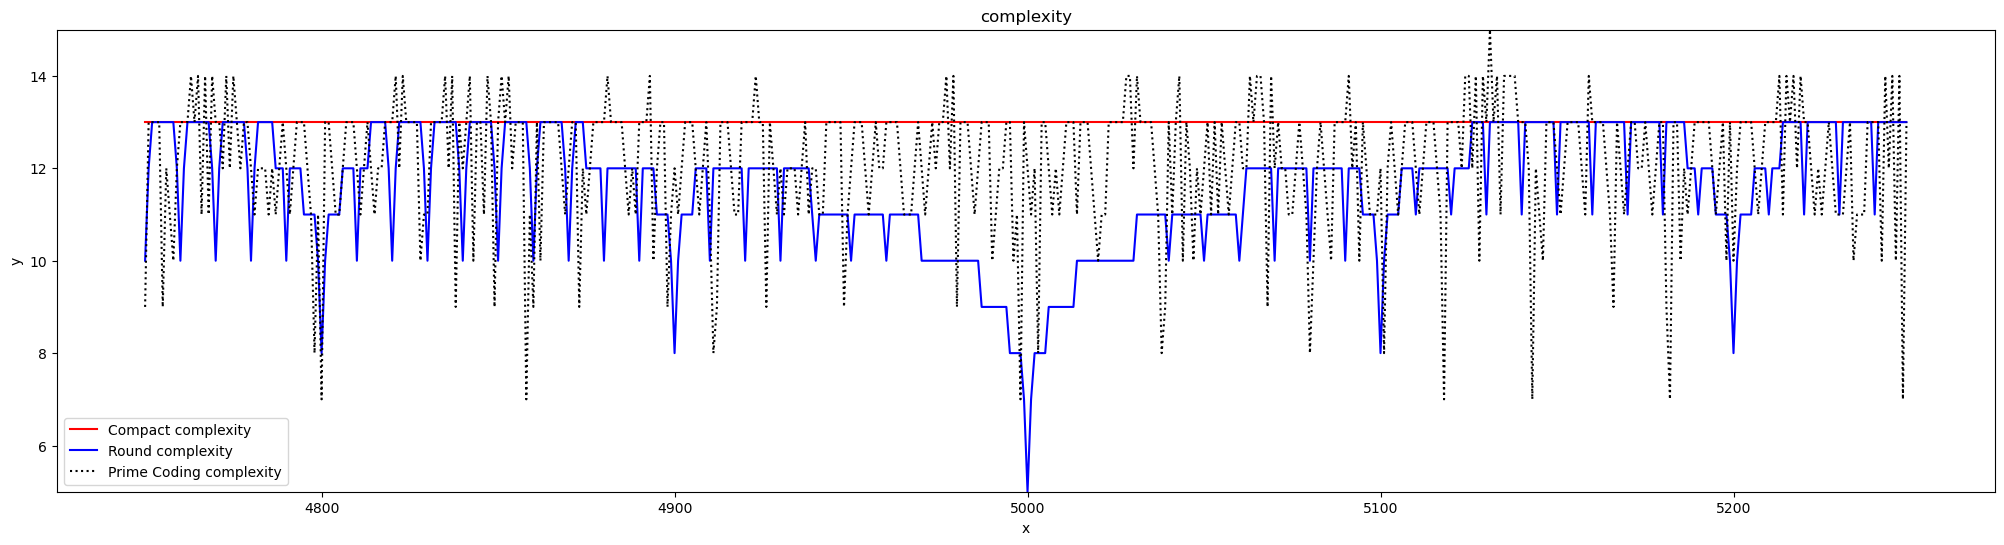

5.880872488021851


In [55]:
t = time()
liste_num = []
liste_compact = []
liste_round = []
liste_decompose = []
liste_skip = []
liste_proxy = []
liste_prime_coding = []
for i in tqdm(range (4750, 5250), desc="Traitement en cours"):
    liste_num.append(i)
    liste_compact.append(complexity(CompactCoding(i)))
    liste_round.append(complexity(RoundReferenceCoding(i)))
    liste_decompose.append(complexity(PrimeDecomposeCoding(i)))
    liste_skip.append(complexity(PrimeSkipCoding(i)))
    liste_proxy.append(complexity(PrimeProxyCoding(i)))
    liste_prime_coding.append(complexity(PrimeCoding(i)))
    
plt.figure(figsize=(25, 6))
plt.plot(liste_num, liste_compact, label='Compact complexity', color='red')
plt.plot(liste_num, liste_round, label='Round complexity', color='blue')
# plt.plot(liste_num, liste_decompose, label='Prime Decompose complexity', color='green')
# plt.plot(liste_num, liste_skip, label='Prime Skip complexity', color='cyan')
# plt.plot(liste_num, liste_proxy, label='Prime Proxy complexity', color='purple')
plt.plot(liste_num, liste_prime_coding, label='Prime Coding complexity', color='k', ls=':')
plt.xlabel('x')
plt.ylabel('y')
plt.title('complexity')
plt.ylim(5, 15)
plt.legend()
plt.show()

print (time() - t)

Traitement en cours: 100%|██████████| 10000/10000 [00:52<00:00, 188.87it/s]


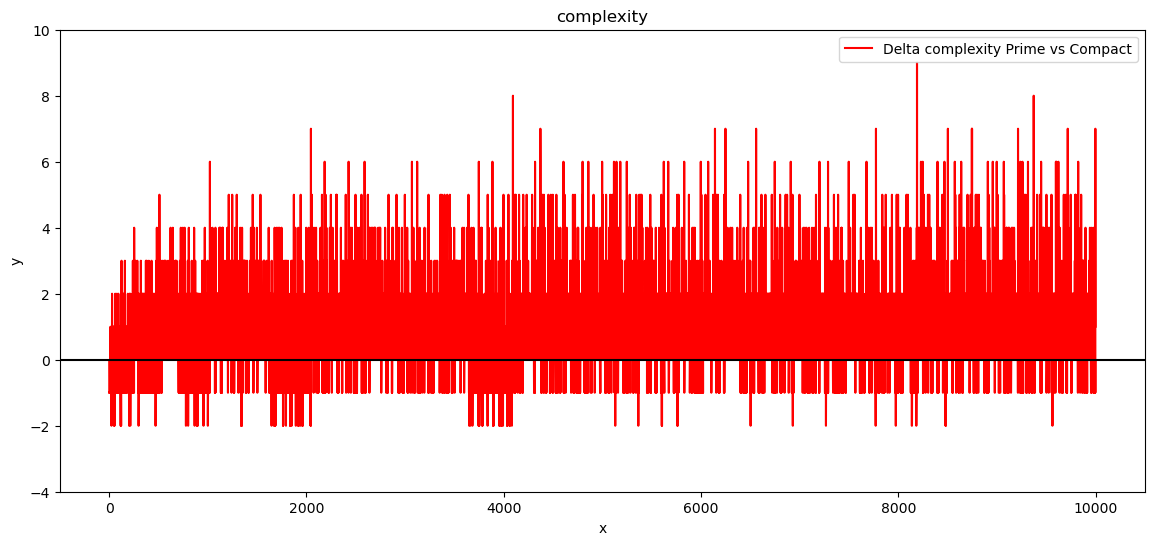

53.58416247367859


In [56]:
t = time()
liste_num = []
liste_diff = []
liste_diff2 = []

for i in tqdm(range(10000), desc="Traitement en cours"):
    liste_num.append(i)
    liste_diff.append(complexity(CompactCoding(i)) - complexity(PrimeCoding(i)))
#     liste_diff2.append(complexity(RoundReferenceCoding(i)) - complexity(PrimeCoding(i)))
    
plt.figure(figsize=(14, 6))
plt.plot(liste_num, liste_diff, label='Delta complexity Prime vs Compact', color='red')
# plt.plot(liste_num, liste_diff2, label='Delta complexity Prime vs Round', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black', linestyle='-')
plt.title('complexity')
plt.ylim(-4, 10)
plt.legend()
plt.show()

print (time() - t)

In [57]:
print (len(liste_diff))
print(sum(1 for valeur in liste_diff if valeur > 0))
print(sum(1 for valeur in liste_diff if valeur == 0))
print(sum(1 for valeur in liste_diff if valeur < 0))
print(np.mean(liste_diff))

10000
4631
3849
1520
0.6833


Traitement en cours: 100%|██████████| 10000/10000 [00:25<00:00, 390.68it/s]


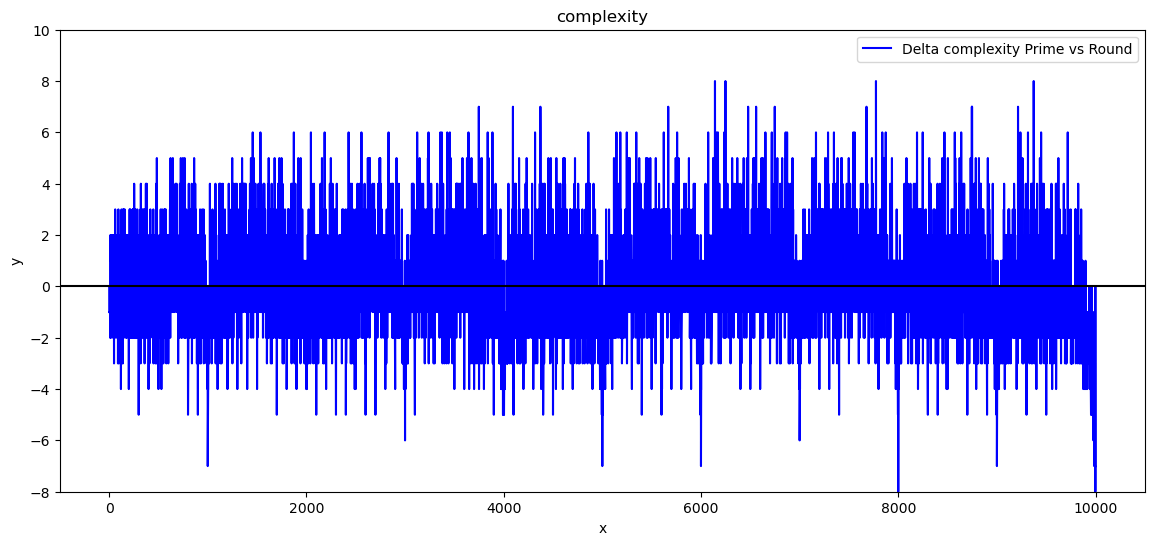

25.79724907875061


In [59]:
t = time()
liste_num = []
liste_diff = []
liste_diff2 = []

for i in tqdm(range(10000), desc="Traitement en cours"):
    liste_num.append(i)
#     liste_diff.append(complexity(CompactCoding(i)) - complexity(PrimeCoding(i)))
    liste_diff2.append(complexity(RoundReferenceCoding(i)) - complexity(PrimeCoding(i)))
    
plt.figure(figsize=(14, 6))
# plt.plot(liste_num, liste_diff, label='Delta complexity Prime vs Compact', color='red')
plt.plot(liste_num, liste_diff2, label='Delta complexity Prime vs Round', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black', linestyle='-')
plt.title('complexity')
plt.ylim(-8, 10)
plt.legend()
plt.show()

print (time() - t)

In [60]:
print (len(liste_diff2))
print(sum(1 for valeur in liste_diff2 if valeur > 0))
print(sum(1 for valeur in liste_diff2 if valeur == 0))
print(sum(1 for valeur in liste_diff2 if valeur < 0))
print(np.mean(liste_diff2))

10000
4117
2281
3602
0.1167
